In [5]:
import pandas as pd

df = pd.read_csv('train.csv')

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_45333/3686871939.py:3: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [7]:
df.shape

(36871, 23)

In [8]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cd', 'generation', 'state', 'zipcode',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

Dropping unwanted columns

In [9]:
df.drop(columns= ['id', 'Unnamed: 21', 'Unnamed: 22'], inplace= True)

JOB Column

In [11]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan, 'MANAGEMENT', 'STUDENT',
       'ENTREPRENEUR', 'HOUSEMAID', 'RETIRED', 'UNEMPLOYED', 'TECHNICIAN',
       'ADMIN.', 'BLUE-COLLAR', 'SELF-EMPLOYED'], dtype=object)

In [23]:
#variable are same but in differnet name
df['job'] = df['job'].str.lower()

In [24]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan], dtype=object)

In [28]:
missing = df['job'].isnull().sum()
total = len(df['job'])

percent_missing = (missing/total)*100
print(percent_missing)

percent_nan = df['job'].isnull().mean() * 100
print(percent_nan)

#pre processing pipeline

0.14103224756583765
0.14103224756583765


Text(0.5, 1.0, 'job')

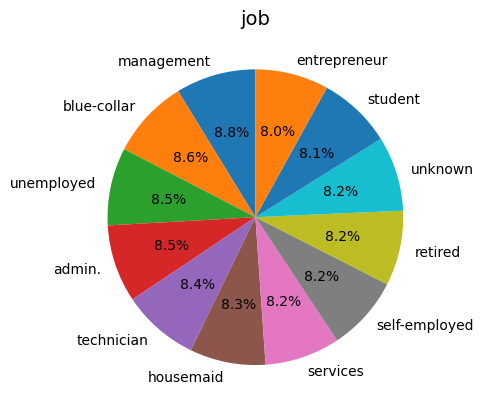

In [31]:
import matplotlib.pyplot as plt

category_counts = df['job'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=14)

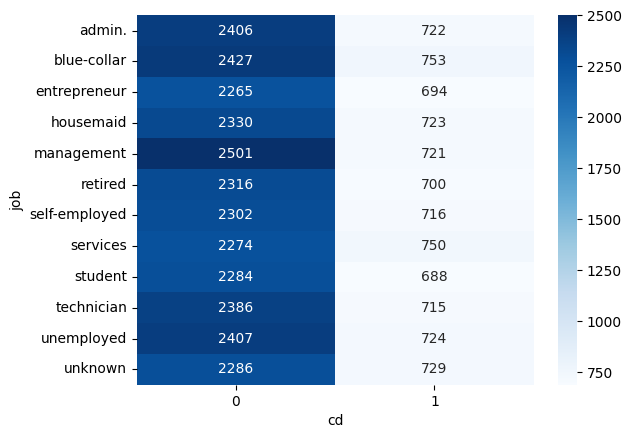

In [42]:
import seaborn as sns
crosstab = pd.crosstab(df['job'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('job')
plt.xlabel('cd')
plt.show()

Marital Column

Text(0.5, 1.0, 'marital')

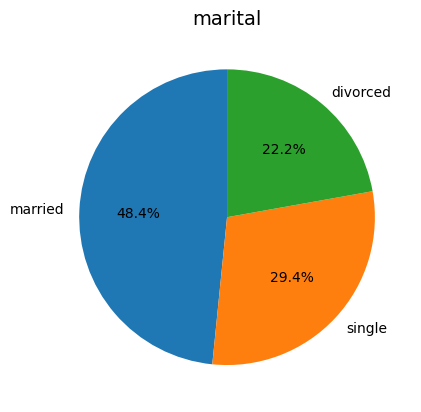

In [60]:
category_counts = df['marital'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('marital', fontsize=14)

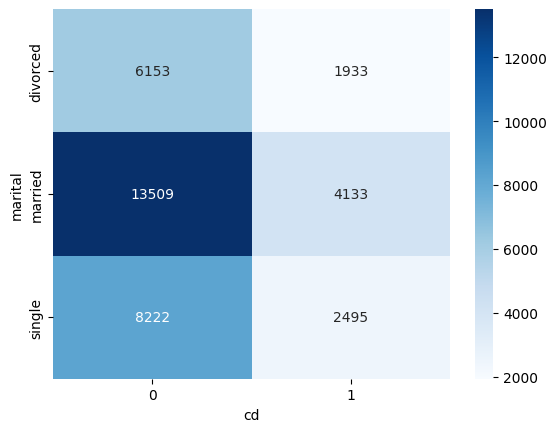

In [41]:
crosstab = pd.crosstab(df['marital'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('marital')
plt.xlabel('cd')
plt.show()

Poutcome

In [37]:
df['poutcome'].unique()

array(['failure', 'unknown', 'other', 'success'], dtype=object)

Text(0.5, 1.0, 'poutcome')

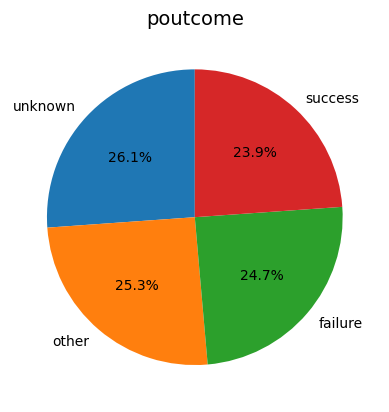

In [38]:
category_counts = df['poutcome'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('poutcome', fontsize=14)

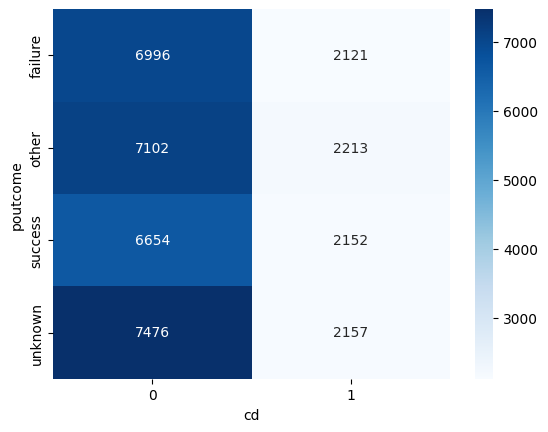

In [40]:
crosstab = pd.crosstab(df['poutcome'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('cd')
plt.ylabel('poutcome')
plt.show()

Contact

Text(0.5, 1.0, 'contact')

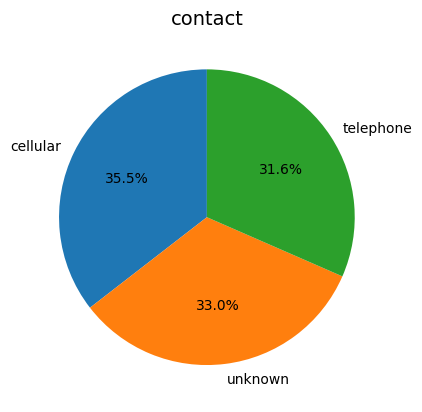

In [43]:
category_counts = df['contact'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('contact', fontsize=14)

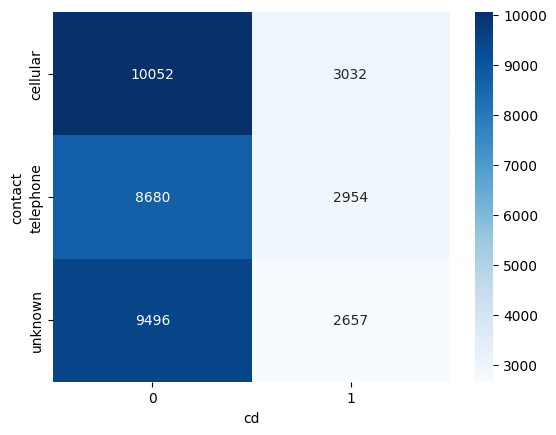

In [44]:
crosstab = pd.crosstab(df['contact'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('contact')
plt.xlabel('cd')
plt.show()

Generation

In [45]:
df['generation'].unique()

array(['Millennials', 'Silent Generation', 'Older Boomers', 'Gen X',
       'Younger Boomers', nan, 'millennials', 'gen x',
       'silent generation', 'older boomers', 'Millenials', 'oler boomers'],
      dtype=object)

In [46]:
df['generation'] = df['generation'].str.lower()

In [53]:
df['generation'] = df['generation'].replace({
    'oler boomers': 'older boomers',
    'millennials': 'millenials'
})

Text(0.5, 1.0, 'generation')

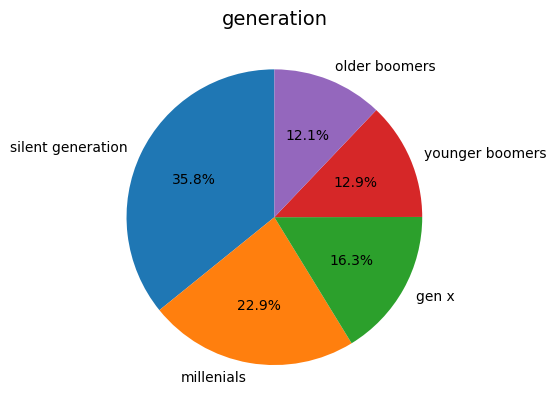

In [54]:
category_counts = df['generation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('generation', fontsize=14)

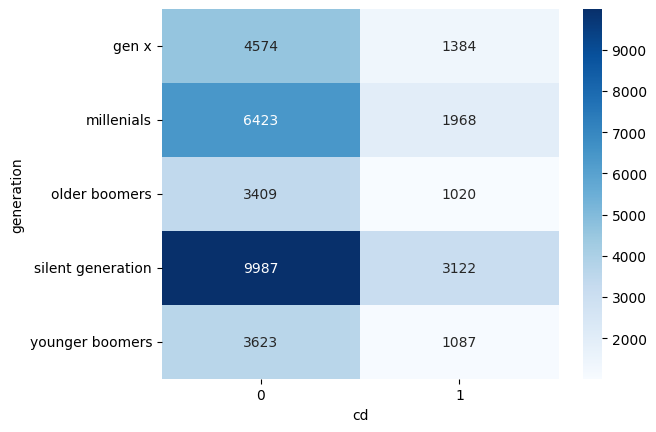

In [55]:
crosstab = pd.crosstab(df['generation'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('generation')
plt.xlabel('cd')
plt.show()

Education

In [56]:
df['education'].unique()

array(['tertiary', 'primary', 'unknown', 'secondary', 'primery',
       'secendary'], dtype=object)

In [57]:
df['education'] = df['education'].replace({
    'tertiary': 'Tertiary',
    'primary': 'Primary',
    'primery': 'Primary',    
    'secondary': 'Secondary',
    'secendary': 'Secondary', 
    'unknown': 'Unknown'
})

Text(0.5, 1.0, 'education')

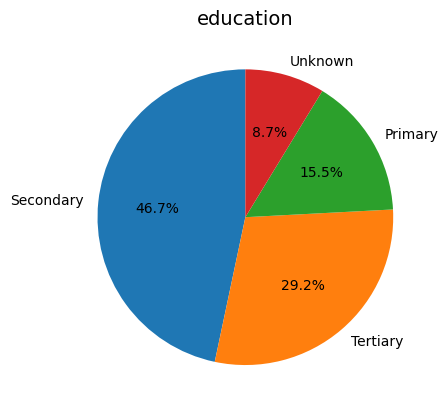

In [58]:
category_counts = df['education'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('education', fontsize=14)

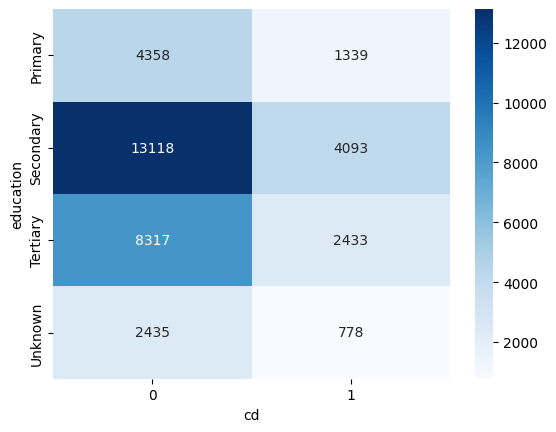

In [59]:
crosstab = pd.crosstab(df['education'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.ylabel('education')
plt.xlabel('cd')
plt.show()

Relationship between categorical columns
1. Job and Marital, Job and Eductaion, Marital and Generation these have very strong association
    1. Applying OHE because on boosting and tree based model wouldnt be affected by multicollinearity
2. poutcome with job, marital, and contact have weak association
    1. non-multicollinearity

In [65]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education']

# Function to perform Chi-Square test between all pairs of specified categorical columns
chi_square_results = []
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform Chi-Square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            # Append results
            chi_square_results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-Square': chi2,
                'p-value': p_value
            })

chi_square_df = pd.DataFrame(chi_square_results)
significant_results = chi_square_df[chi_square_df['p-value'] < 0.05]
print("Significant Chi-Square Test Results")
print(significant_results)

Significant Chi-Square Test Results
      Column 1    Column 2    Chi-Square       p-value
0          job     marital   3205.738263  0.000000e+00
1          job    poutcome     70.746002  1.455071e-04
3          job  generation     94.721222  1.412209e-05
4          job   education  21659.974619  0.000000e+00
5      marital         job   3205.738263  0.000000e+00
6      marital    poutcome     25.450480  2.817135e-04
8      marital  generation   2439.928282  0.000000e+00
9      marital   education    294.178042  1.445724e-60
10    poutcome         job     70.746002  1.455071e-04
11    poutcome     marital     25.450480  2.817135e-04
12    poutcome     contact     27.071815  1.403896e-04
13    poutcome  generation     30.852114  2.074902e-03
17     contact    poutcome     27.071815  1.403896e-04
20  generation         job     94.721222  1.412209e-05
21  generation     marital   2439.928282  0.000000e+00
22  generation    poutcome     30.852114  2.074902e-03
25   education         job  2

Relationship between categorical columns and target column
1. poutcome and contact have strong association with target column
    1. Applying target mean encoding to capture their relationship with the target

In [66]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education']
chi_square_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['cd'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Column': col,
        'Chi-Square': chi2,
        'p-value': p_value
    })


chi_square_df = pd.DataFrame(chi_square_results)
significant_results = chi_square_df[chi_square_df['p-value'] < 0.05]
print("Significant Chi-Square Test Results with Target")
print(significant_results)


Significant Chi-Square Test Results with Target
     Column  Chi-Square       p-value
2  poutcome   11.463713  9.465348e-03
3   contact   42.039441  7.434492e-10


In [ ]:
import prince

categorical_columns = ['job', 'marital', 'poutcome', 'contact', 'generation', 'education']

# Initialize MCA
mca = prince.MCA(
    n_components=2,  # Number of components to retain
    n_iter=3,
    random_state=42
)

# Fit MCA on the selected categorical columns
mca_result = mca.fit(df[categorical_columns])
a
mca_transformed = mca.transform(df[categorical_columns])

# Plot the MCA results
plt.figure(figsize=(10, 7))
plt.scatter(mca_transformed[0], mca_transformed[1], alpha=0.7)
plt.xlabel('MCA Dimension 1')
plt.ylabel('MCA Dimension 2')
plt.title('MCA of Categorical Columns')
plt.show()
